In [13]:
# Imports
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

In [31]:

path = 'reports/results/results.csv'
def DER_extraction(path):
    
    df = pd.read_csv (path)
    der_alloc = []
    der_rl = []
    i = 0
    for der in df['DER']:
        if i % 2 == 0:
            der_alloc.append(der)
        else :
            der_rl.append(der)
        i = i +1
    return der_alloc, der_rl
def energy_extraction(path):
    
    df = pd.read_csv (path)
    e_alloc = []
    e_rl = []
    i = 0
    for e in df['Energy']:
        if i % 2 == 0:
            e_alloc.append(e)
        else :
            e_rl.append(e)
        i = i +1
    return e_alloc, e_rl

def generate_node_counter(n):
    nodes = []
    for i in range (500,500*(n+1),500):
        nodes.append(i)
    return nodes

der_alloc,der_rl = DER_extraction(path)
e_alloc, e_rl = energy_extraction(path)
nodes = generate_node_counter(len(der_alloc))
print(nodes)

[500, 1000, 1500, 2000, 2500]


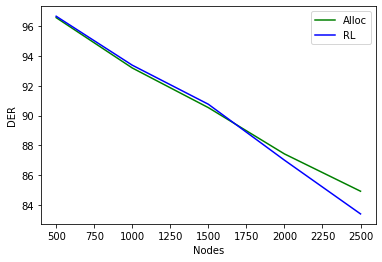

In [32]:
plt.plot(nodes,der_alloc,color='green', label = 'Alloc')
plt.plot(nodes,der_rl,color='blue', label = 'RL')
plt.legend()
plt.ylabel('DER')
plt.xlabel('Nodes')
plt.show()

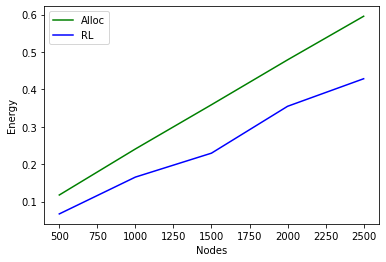

In [33]:
plt.plot(nodes,e_alloc,color='green', label = 'Alloc')
plt.plot(nodes,e_rl,color='blue', label = 'RL')
plt.legend()
plt.ylabel('Energy')
plt.xlabel('Nodes')
plt.show()